# Construct dataset

In [4]:
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pylab
from pycbc.filter import sigma
from pycbc.waveform import get_td_waveform
from pycbc.types.timeseries import load_timeseries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import uniform, randint
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split

#import false signal functions
from ipynb.fs.full.falsig_functions import random_false_sig, flip_gw
from ipynb.fs.full.data_functions import noise, burried_gw, partial_burried_false, partial_burried_gw, partial_burried_gw_jr, burried_false, burried_flip, visualize,bol, empty_gaussian

Trial 2 information:
- SNR 100 - 1000 randomly generated, full
- signals partially contained in windows of 1 second, >50%
- masses randomly generated (ranges for masses shown below)
- train and test generated in one batch. Then separate.


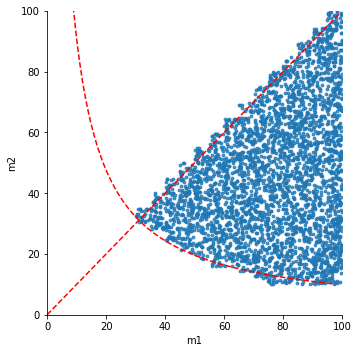

In [5]:
# Randomly generate masses that will produce waveform that fit in around 0.8s
mass = []
for i in np.arange(1):   # repeat process twice for data
    for u in np.arange(95,101):
        for l in np.arange(10,101):
            mass.append([uniform(95,100),uniform(10,100)])
    for u in np.arange(90,95):
        for l in np.arange(10,95):
            mass.append([uniform(90,95),uniform(10,95)])
    for u in np.arange(85,90):
        for l in np.arange(10,90):
            mass.append([uniform(85,90),uniform(10,90)])
    for u in np.arange(80,85):
        for l in np.arange(10,85):
            mass.append([uniform(80,85),uniform(10,85)])
    for u in np.arange(75,80):
        for l in np.arange(10,80):
            mass.append([uniform(75,80),uniform(10,80)])
    for u in np.arange(70,75):
        for l in np.arange(12,75):
            mass.append([uniform(70,75),uniform(12,75)])
    for u in np.arange(65,70):
        for l in np.arange(14,70):
            mass.append([uniform(65,70),uniform(14,70)])
    for u in np.arange(60,65):
        for l in np.arange(16,65):
            mass.append([uniform(60,65),uniform(16,65)])
    for u in np.arange(55,60):
        for l in np.arange(16,60):
            mass.append([uniform(55,60),uniform(16,60)])
    for u in np.arange(50,55):
        for l in np.arange(18,55):
            mass.append([uniform(50,55),uniform(18,55)])
    for u in np.arange(45,50):
        for l in np.arange(20,50):
            mass.append([uniform(45,50),uniform(20,50)])
    for u in np.arange(40,45):
        for l in np.arange(24,45):
            mass.append([uniform(40,45),uniform(24,45)])
    for u in np.arange(35,40):
        for l in np.arange(28,40):
            mass.append([uniform(35,40),uniform(28,40)])
    for u in np.arange(30,35):
        for l in np.arange(30,35):
            mass.append([uniform(30,35),uniform(30,35)])

mass = pd.DataFrame(mass)
mass.columns = ['m1','m2']

# Create scatterplot of dataframe
sns.lmplot('m1', 'm2', data=mass, fit_reg=False, 
           scatter_kws={"s": 8})
plt.ylim(0,100)
plt.xlim(0,100)

plt.plot(np.arange(100),'r--')
plt.plot(1000/np.arange(1,100),'r--')
plt.show()

Unexpected finding: for length to be less than around 0.8, we have the range of masses constrained by the above 2 functions!

In [6]:
# constants and variables
mag = -21   # for false signals. Try to be close to the amplitude of gw signals
select1 = bol(4,len(mass))
select2 = bol(2,1600)

In [7]:
def appendXy(wave,target):
    wave.save('temporary2.txt')
    wave = np.loadtxt('temporary2.txt',usecols=1)
    X.append(wave)
    y.append(target)

In [10]:
X = []
y = []

# SNR 100 - 1000 randomly generated, full ones

for i in tqdm(range(len(mass))):
    snr = uniform(100,1000)
    gww = burried_gw(mass.loc[i,'m1'], mass.loc[i,'m2'], snr)
    appendXy(gww,1)
    
    # Insert false flipped case as well as empty gaussian after every 5 true cases
    if select1[i]:
        wf = burried_flip(mass.loc[i,'m1'], mass.loc[i,'m2'], snr)
        appendXy(wf,0)
        
        wf = noise(gww,snr)
        appendXy(wf,0)


100%|██████████| 3681/3681 [14:42<00:00,  3.57it/s]


In [11]:
# generate graviational wave with mass 10-100, snr 100-1000, partial percentage 0.5-1
for i in tqdm(range(1500)):
    wf = partial_burried_gw_jr(uniform(10,100),uniform(10,100),uniform(100,1000),uniform(0.5,1))
    appendXy(wf,1)
    
# Generate partial false signals: snr 100-1000, partial percentage 0.5-1
for i in tqdm(range(3340)):
    wf = partial_burried_false(-randint(20,23),uniform(100,1000),uniform(0.5,1))
    appendXy(wf,0)

  0%|          | 0/1500 [00:00<?, ?it/s]/Users/DRRRR/anaconda/envs/machinelearning/lib/python3.6/site-packages/pycbc/scheme.py:189: RuntimeWarning: divide by zero encountered in true_divide
  return _import_cache[mgr.state][fn](*args, **kwds)
/Users/DRRRR/anaconda/envs/machinelearning/lib/python3.6/site-packages/pycbc/scheme.py:189: RuntimeWarning: invalid value encountered in true_divide
  return _import_cache[mgr.state][fn](*args, **kwds)
  1%|▏         | 21/1500 [00:06<10:19,  2.39it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


  2%|▏         | 36/1500 [00:09<04:41,  5.21it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


  3%|▎         | 50/1500 [00:12<04:36,  5.25it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.
Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


  4%|▍         | 61/1500 [00:14<05:36,  4.28it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


  4%|▍         | 63/1500 [00:15<05:04,  4.72it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


  5%|▍         | 74/1500 [00:17<04:49,  4.92it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


  6%|▌         | 93/1500 [00:22<09:39,  2.43it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


  9%|▉         | 137/1500 [00:32<03:57,  5.73it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 10%|▉         | 144/1500 [00:33<03:57,  5.70it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 10%|█         | 157/1500 [00:35<04:17,  5.23it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 12%|█▏        | 173/1500 [00:39<05:11,  4.25it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 12%|█▏        | 182/1500 [00:41<04:20,  5.07it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 12%|█▏        | 187/1500 [00:42<04:27,  4.91it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 13%|█▎        | 193/1500 [00:44<04:58,  4.38it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 14%|█▍        | 216/1500 [00:49<04:23,  4.87it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 15%|█▌        | 226/1500 [00:51<04:17,  4.95it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 16%|█▌        | 242/1500 [00:54<04:15,  4.92it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 17%|█▋        | 251/1500 [00:56<04:41,  4.43it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 17%|█▋        | 255/1500 [00:56<04:12,  4.93it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 17%|█▋        | 260/1500 [00:57<03:50,  5.38it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 18%|█▊        | 263/1500 [00:58<03:54,  5.27it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 18%|█▊        | 269/1500 [00:59<03:47,  5.42it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 19%|█▉        | 287/1500 [01:03<03:42,  5.45it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 20%|█▉        | 293/1500 [01:04<04:13,  4.77it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 20%|█▉        | 294/1500 [01:04<04:26,  4.53it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 22%|██▏       | 323/1500 [01:10<03:57,  4.95it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 24%|██▍       | 360/1500 [01:18<03:39,  5.20it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 24%|██▍       | 363/1500 [01:18<03:25,  5.55it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 24%|██▍       | 365/1500 [01:19<03:34,  5.30it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 26%|██▌       | 385/1500 [01:26<08:12,  2.26it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 26%|██▌       | 390/1500 [01:28<07:25,  2.49it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 26%|██▋       | 395/1500 [01:30<08:20,  2.21it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 27%|██▋       | 398/1500 [01:31<07:30,  2.45it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 27%|██▋       | 405/1500 [01:34<08:43,  2.09it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 27%|██▋       | 407/1500 [01:35<09:11,  1.98it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 30%|███       | 455/1500 [01:45<03:45,  4.63it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 30%|███       | 456/1500 [01:45<04:07,  4.21it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 32%|███▏      | 476/1500 [01:50<03:22,  5.06it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 32%|███▏      | 486/1500 [01:52<03:11,  5.31it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 32%|███▏      | 487/1500 [01:52<03:27,  4.87it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 35%|███▍      | 518/1500 [02:00<03:30,  4.67it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 36%|███▌      | 533/1500 [02:03<03:12,  5.03it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 36%|███▌      | 538/1500 [02:04<03:05,  5.20it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 37%|███▋      | 549/1500 [02:06<03:57,  4.01it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 37%|███▋      | 552/1500 [02:07<03:22,  4.69it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 38%|███▊      | 565/1500 [02:12<04:48,  3.24it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 38%|███▊      | 575/1500 [02:14<03:30,  4.40it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 39%|███▉      | 585/1500 [02:16<03:22,  4.52it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 40%|████      | 600/1500 [02:19<03:20,  4.49it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 41%|████      | 611/1500 [02:22<04:18,  3.44it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 41%|████      | 616/1500 [02:24<05:25,  2.72it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 42%|████▏     | 627/1500 [02:26<03:14,  4.49it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 42%|████▏     | 631/1500 [02:27<03:12,  4.52it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 42%|████▏     | 637/1500 [02:29<03:24,  4.22it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 45%|████▌     | 679/1500 [02:40<03:36,  3.80it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 46%|████▌     | 685/1500 [02:41<03:24,  3.98it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 46%|████▋     | 696/1500 [02:44<02:55,  4.59it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.
Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.

 47%|████▋     | 712/1500 [02:47<02:32,  5.15it/s]


Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 48%|████▊     | 721/1500 [02:49<02:25,  5.36it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.
Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 48%|████▊     | 723/1500 [02:49<02:37,  4.93it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 49%|████▉     | 738/1500 [02:53<02:35,  4.89it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.
Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 49%|████▉     | 740/1500 [02:53<02:35,  4.89it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 52%|█████▏    | 773/1500 [03:00<02:34,  4.71it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 52%|█████▏    | 784/1500 [03:02<02:22,  5.04it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 53%|█████▎    | 801/1500 [03:06<02:19,  5.00it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 54%|█████▎    | 805/1500 [03:07<02:21,  4.92it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 55%|█████▌    | 825/1500 [03:11<03:39,  3.08it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 55%|█████▌    | 827/1500 [03:12<03:14,  3.46it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 56%|█████▌    | 834/1500 [03:13<02:37,  4.24it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 57%|█████▋    | 852/1500 [03:19<02:38,  4.09it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 57%|█████▋    | 856/1500 [03:20<02:29,  4.32it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 57%|█████▋    | 857/1500 [03:20<02:29,  4.30it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 57%|█████▋    | 862/1500 [03:21<02:23,  4.45it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 58%|█████▊    | 874/1500 [03:24<03:37,  2.88it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 59%|█████▉    | 882/1500 [03:26<02:20,  4.41it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 60%|█████▉    | 893/1500 [03:29<02:12,  4.59it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 60%|█████▉    | 898/1500 [03:30<01:59,  5.05it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 60%|█████▉    | 899/1500 [03:30<02:11,  4.55it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 61%|██████    | 909/1500 [03:32<01:56,  5.05it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 62%|██████▏   | 931/1500 [03:36<01:48,  5.27it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 63%|██████▎   | 945/1500 [03:39<01:47,  5.16it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 64%|██████▍   | 960/1500 [03:42<01:38,  5.49it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 64%|██████▍   | 963/1500 [03:42<01:36,  5.58it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 65%|██████▌   | 976/1500 [03:45<01:42,  5.09it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 65%|██████▌   | 979/1500 [03:46<02:05,  4.16it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 66%|██████▌   | 987/1500 [03:47<01:39,  5.16it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 66%|██████▋   | 994/1500 [03:48<01:32,  5.44it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 67%|██████▋   | 999/1500 [03:50<01:49,  4.58it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 67%|██████▋   | 1003/1500 [03:51<02:19,  3.57it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.
Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 67%|██████▋   | 1010/1500 [03:52<01:40,  4.89it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 70%|██████▉   | 1043/1500 [03:59<01:33,  4.86it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 70%|██████▉   | 1045/1500 [04:00<01:32,  4.93it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 72%|███████▏  | 1074/1500 [04:07<01:35,  4.47it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 72%|███████▏  | 1075/1500 [04:07<01:44,  4.08it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 72%|███████▏  | 1084/1500 [04:09<01:27,  4.74it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 76%|███████▌  | 1139/1500 [04:20<01:14,  4.81it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 76%|███████▋  | 1144/1500 [04:21<01:14,  4.78it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 77%|███████▋  | 1148/1500 [04:22<01:10,  4.97it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 77%|███████▋  | 1153/1500 [04:23<01:10,  4.95it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.
Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 78%|███████▊  | 1163/1500 [04:25<01:08,  4.89it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 78%|███████▊  | 1174/1500 [04:27<01:14,  4.39it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 79%|███████▉  | 1188/1500 [04:30<01:04,  4.86it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 79%|███████▉  | 1190/1500 [04:31<01:02,  4.97it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.
Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.

 81%|████████  | 1215/1500 [04:36<01:04,  4.43it/s]


Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 81%|████████▏ | 1220/1500 [04:38<01:11,  3.92it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 82%|████████▏ | 1235/1500 [04:42<01:07,  3.95it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 84%|████████▎ | 1255/1500 [04:46<00:50,  4.85it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 85%|████████▍ | 1268/1500 [04:49<00:53,  4.37it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 86%|████████▌ | 1283/1500 [04:52<00:42,  5.08it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 87%|████████▋ | 1310/1500 [04:57<00:34,  5.44it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.
Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 89%|████████▉ | 1332/1500 [05:01<00:38,  4.35it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 91%|█████████ | 1364/1500 [05:09<00:27,  4.88it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 92%|█████████▏| 1374/1500 [05:11<00:37,  3.38it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 94%|█████████▍| 1414/1500 [05:21<00:16,  5.13it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 95%|█████████▌| 1427/1500 [05:23<00:15,  4.73it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 96%|█████████▌| 1434/1500 [05:25<00:13,  4.74it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 96%|█████████▌| 1440/1500 [05:26<00:13,  4.61it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


 99%|█████████▉| 1492/1500 [05:41<00:02,  3.07it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


100%|█████████▉| 1497/1500 [05:42<00:00,  3.69it/s]

Input percentage does not match actual returned signal percentage because waveform is too long. The beginning is thus cropped.


100%|██████████| 3340/3340 [12:04<00:00,  5.55it/s]


maybe mass range a little too wide

In [12]:
# Save as dataframe
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [14]:
# Since sklearn makes things a lot easier, can just store the whole data and split every time. 
# If want to recreate the split just use same random seed

# '''ALREADY DONE NO NEED REPEAT
f_path = 'training_data/2A/X.txt'
X_df.to_csv(f_path)
f_path = 'training_data/2A/y.txt'
y_df.to_csv(f_path) 
#'''

# Data Statistics

In [13]:
# statistic information
print("Number of data: ",len(X))

pos = 0
for i in np.arange(len(X)):
    pos += y[i]

print("Percentage ",100* pos/len(X), "% of data contains gw wave.")

Number of data:  10361
Percentage  50.00482578901651 % of data contains gw wave.
